In [1]:
pip install librosa pyAudioAnalysis numpy matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 3.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.0/414.0 kB 3.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 5.8 MB/s eta 0:00:0000:0100:01
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264373 sha256=b48557dcc9466309c921c7374a268cc0f30cc4731f4b64e4038957263d8b7b2f
  Stored in directory: /Users/abc/Library/Caches/pip/wheels/17/2b/6d/a471b671e635715037e006a8dd0dd129156926645bf1441d39
Successfully built pyAudioAnalysis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24

In [5]:
pip install numba==0.57.1 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 2.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0
    Uninstalling llvmlite-0.38.0:
      Successfully uninstalled llvmlite-0.38.0
  Attempting uninstall: numba
    Found existing installation: numba 0.55.1
    Uninstalling numba-0.55.1:
      Successfully uninstalled numba-0.55.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.1 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


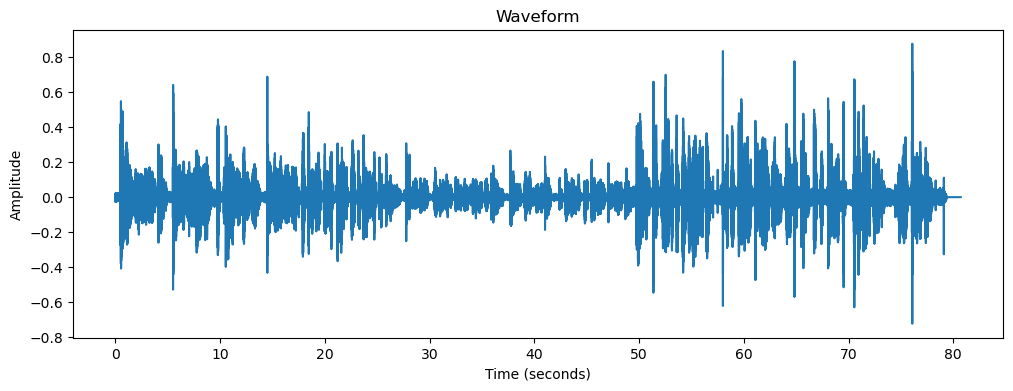

feature:zcr,average value:0.08328176761047565


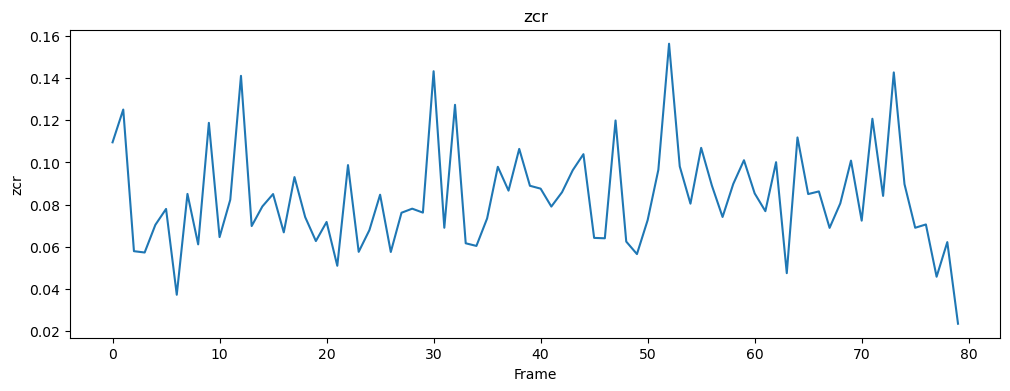

feature:energy,average value:0.003448200064109097


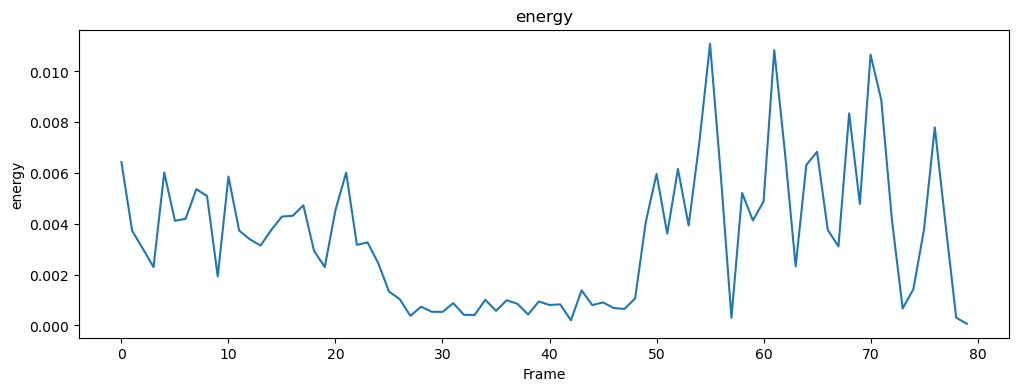

feature:energy_entropy,average value:2.5982182167421852


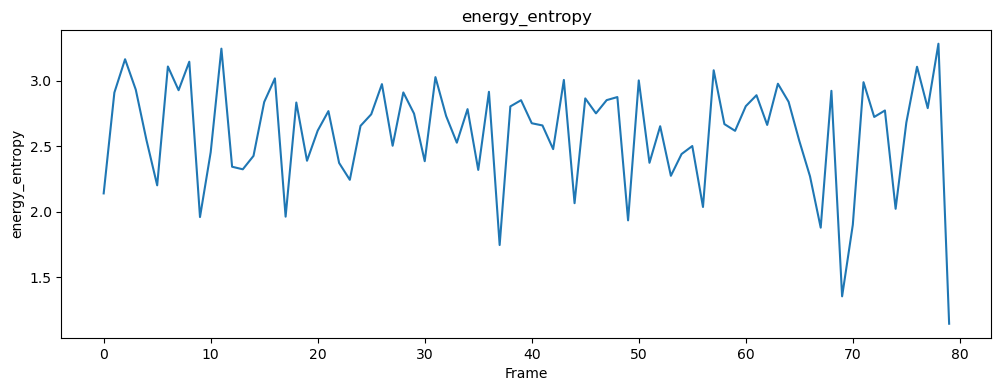

feature:spectral_centroid,average value:0.18550737576206405


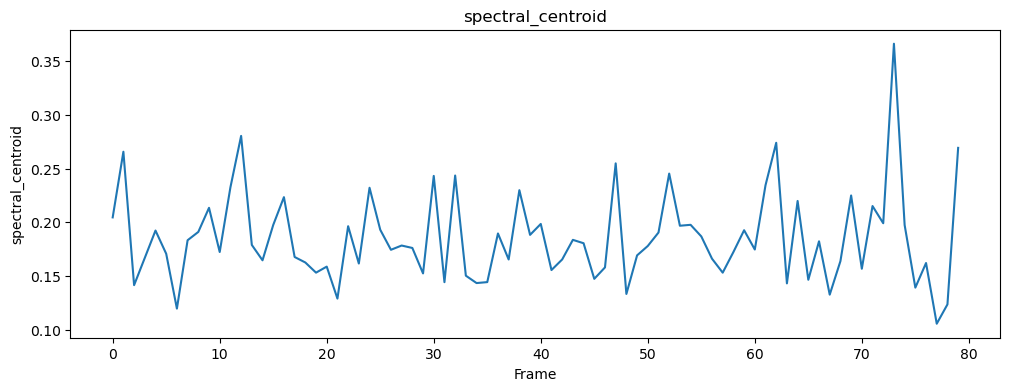

feature:spectral_spread,average value:0.2029478830296217


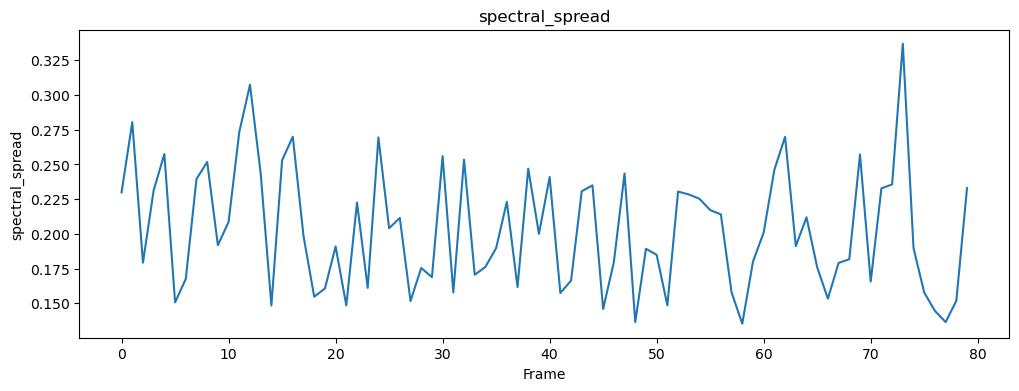

feature:spectral_entropy,average value:0.7086989553558587


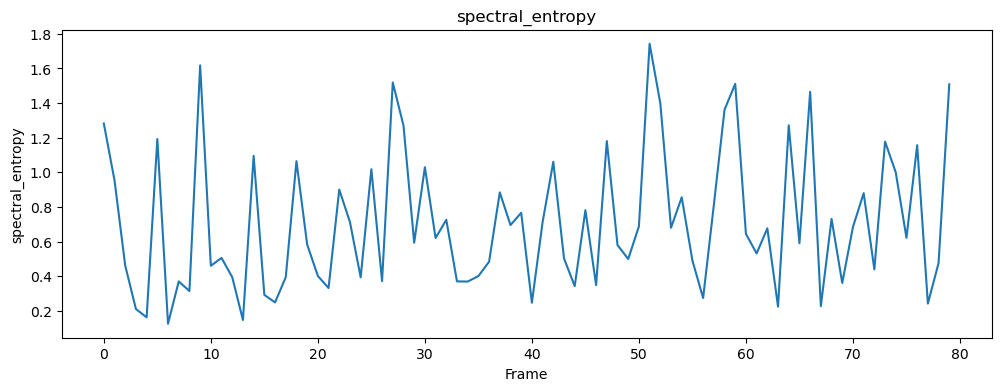

feature:spectral_flux,average value:0.0009304916794140082


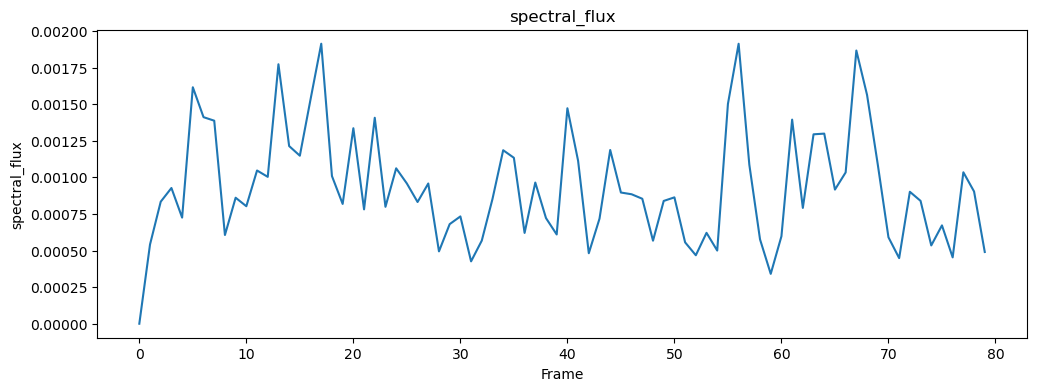

feature:spectral_rolloff,average value:0.1329078125


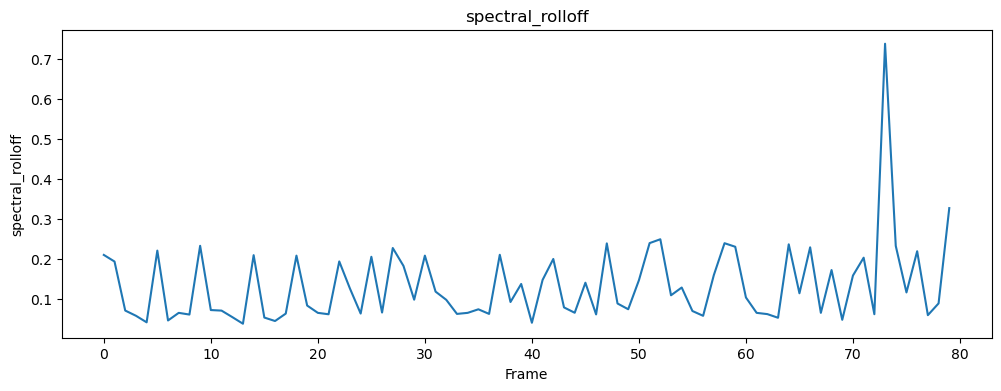

feature:mfcc_1,average value:-22.41912225767421


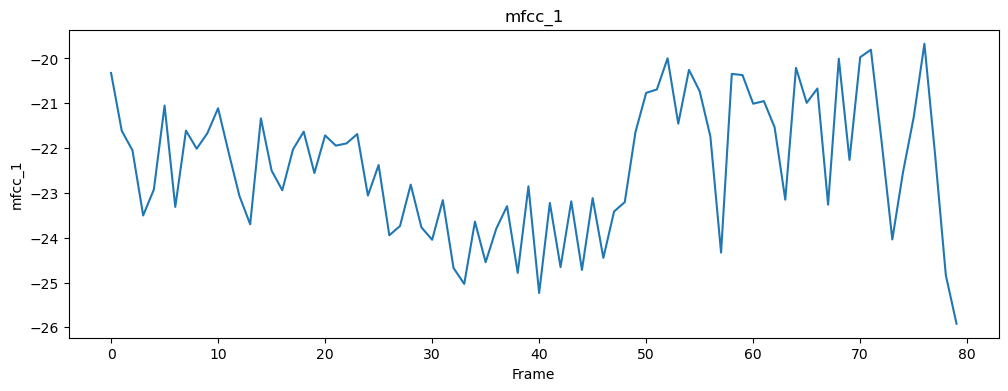

feature:mfcc_2,average value:2.2332738110270194


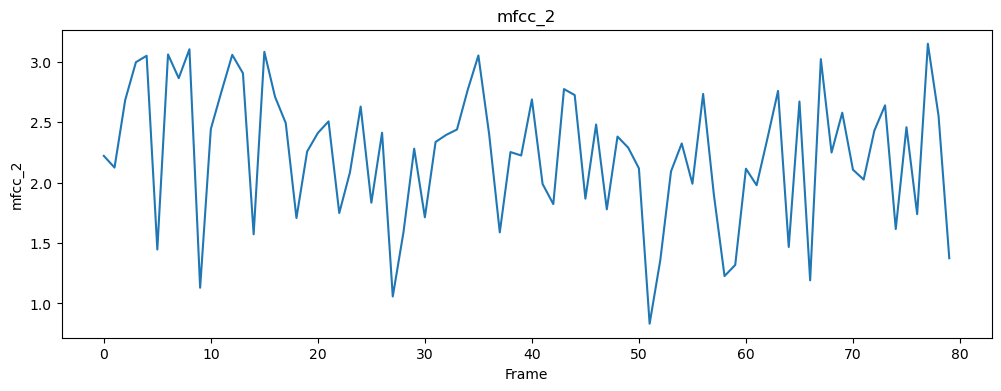

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from pyAudioAnalysis import audioBasicIO, ShortTermFeatures

# Load audio file
audio_file = "output_audio.wav"

# Extract features using pyAudioAnalysiss, fs = librosa.load(audio_file, sr = 16000)
s, Fs = librosa.load(audio_file, sr = 16000)
'''frame_size = 2048
hop_length = 512

# Calculate autocorrelation for each frame
autocorr = librosa.autocorrelate(s, max_size=frame_size)

# Find peaks in autocorrelation
peaks = librosa.util.peak_pick(autocorr, pre_max=10, post_max=10, pre_avg=10, post_avg=10, delta=0.1,wait=10)
nonzero_peaks = peaks[peaks>0]
# Convert lag to frequency (F0)
f0_hz = Fs / nonzero_peaks.astype(float)'''



F, f_names = ShortTermFeatures.feature_extraction(s, Fs,Fs,Fs)

time_axis = np.arange(0, len(s)) / Fs  # Time axis in seconds
plt.figure(figsize=(12, 4))
plt.plot(time_axis, s)
plt.title('Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

'''plt.figure(figsize=(12, 4))
plt.plot(F[0, :])
plt.title('ZCR Contour')
plt.xlabel('Frame')
plt.ylabel('')
plt.show()

# Plot pitch contour
plt.figure(figsize=(12, 4))
plt.plot(F[1, :])
plt.title('Pitch Contour')
plt.xlabel('Frame')
plt.ylabel('Pitch')
plt.show()'''

for i in range(10):
    print(f"feature:{f_names[i]},average value:{np.mean(F[i, :])}")
    plt.figure(figsize=(12, 4))
    plt.plot(F[i, :])
    plt.title(f_names[i])
    plt.xlabel('Frame')
    plt.ylabel(f_names[i])
    plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyAudioAnalysis import audioBasicIO, ShortTermFeatures

# Load audio file
audio_file = "output_audio.wav"

# Extract features using pyAudioAnalysis
[Fs, x] = audioBasicIO.read_audio_file(audio_file)
window_size = int(0.050 * Fs)  # Window size in samples (50 ms)
step_size = int(0.025 * Fs)    # Step size in samples (25 ms)
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, window_size, step_size)

# Check the shape of the feature matrix F
print("Shape of feature matrix F:", F.shape)

# Plot audio waveform
time_axis = np.linspace(0, len(x) / Fs, num=len(x))  # Time axis in seconds
plt.figure(figsize=(12, 4))
plt.plot(time_axis, x)
plt.title('Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# Plot pitch contour
time_frames = np.arange(F.shape[1]) * step_size / Fs  # Time axis in seconds for frames
plt.figure(figsize=(12, 4))
plt.plot(time_frames, F[1, :])  # Assuming pitch is at index 1
plt.title('Pitch Contour')
plt.xlabel('Time (seconds)')
plt.ylabel('Pitch')
plt.show()


ValueError: cannot reshape array of size 4400 into shape (220,10)

In [71]:
average_f0_hz = np.mean(f0_hz[np.nonzero(f0_hz)])  # Exclude zeros and compute mean

print("Average Fundamental Frequency (F0):", average_f0_hz, "Hz")

Average Fundamental Frequency (F0): 27.586322085854576 Hz


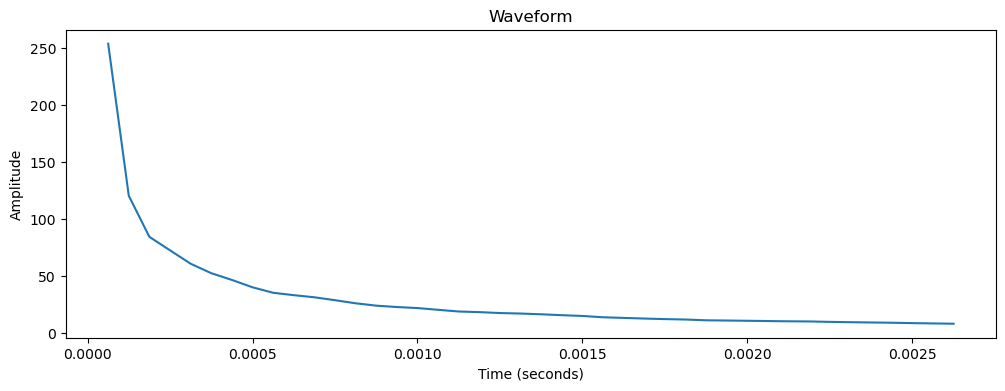

In [61]:

time_axis = np.arange(0, len(f0_hz)) / Fs  # Time axis in seconds
plt.figure(figsize=(12, 4))
plt.plot(time_axis, (f0_hz))
plt.title('Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()


In [24]:
avg_zcr=F[0,]

array([0.10956935, 0.12513282, 0.05787862, 0.05725358, 0.0703794 ,
       0.07794237, 0.03718982, 0.08506782, 0.06112882, 0.11881993,
       0.06456654, 0.08231764, 0.14113382, 0.06981686, 0.07912995,
       0.08500531, 0.06681668, 0.09306832, 0.07406713, 0.06269142,
       0.07175448, 0.05094068, 0.09875617, 0.0575661 , 0.06787924,
       0.08469279, 0.05750359, 0.07612976, 0.07806738, 0.07619226,
       0.14332146, 0.06900431, 0.12738296, 0.06162885, 0.06037877,
       0.07344209, 0.09794362, 0.08663041, 0.10644415, 0.08894306,
       0.08756797, 0.07906744, 0.08588037, 0.09631852, 0.103944  ,
       0.06419151, 0.064004  , 0.119945  , 0.0624414 , 0.05650353,
       0.07262954, 0.09650603, 0.15638477, 0.09813113, 0.08044253,
       0.10694418, 0.08906807, 0.07412963, 0.08981811, 0.10106882,
       0.08531783, 0.0768798 , 0.10013126, 0.04744047, 0.11188199,
       0.08500531, 0.08625539, 0.06894181, 0.08056754, 0.10088131,
       0.07237952, 0.12075755, 0.08413026, 0.14275892, 0.08969

In [4]:
import cv2
import numpy as np
import time
# Function to calculate image contrast for a frame
'''def calculate_contrast(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist_norm = hist / hist.sum()
    contrast = np.sum((hist_norm * np.arange(256))**2)
    return contrast'''
def calculate_contrast(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    contrast = np.std(gray)
    return contrast

# Function to calculate image brightness (mean intensity) for a frame
def calculate_brightness(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return np.mean(gray)

# Function to calculate image colorfulness for a frame
def calculate_colorfulness(image):
    (B, G, R) = cv2.split(image.astype("float"))
    rg = np.absolute(R - G)
    yb = np.absolute(0.5 * (R + G) - B)
    (rb_mean, rb_std) = (np.mean(rg), np.std(rg))
    (yb_mean, yb_std) = (np.mean(yb), np.std(yb))
    std_root = np.sqrt((rb_std ** 2) + (yb_std ** 2))
    mean_root = np.sqrt((rb_mean ** 2) + (yb_mean ** 2))
    colorfulness = std_root + (0.3 * mean_root)
    return colorfulness

# Function to calculate image blurriness for a frame
def calculate_blurriness(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var

# Function to calculate image sharpness for a frame
def calculate_sharpness(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    edge_img = np.sqrt(sobelx**2 + sobely**2)
    return np.mean(edge_img)

# Function to process video and extract features for all frames
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    wait_time = int(1000 / fps*2)
    contrast_values = []
    brightness_values = []
    colorfulness_values = []
    blurriness_values = []
    sharpness_values = []
    prev_time = time.time()
    frame_c=0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        current_time = time.time()
        elapsed_time = current_time - prev_time
        

        if elapsed_time >= 1.0: 
            prev_time =current_time # Process frame once per second
            frame_c+=1
            print("----->",frame_c)
            prev_time = current_time
            # Calculate features for each frame
            contrast = calculate_contrast(frame)
            brightness = calculate_brightness(frame)
            colorfulness = calculate_colorfulness(frame)
            blurriness = calculate_blurriness(frame)
            sharpness = calculate_sharpness(frame)
            #plt.imshow(frame)
            #plt.show()

            # Store feature values for each frame
            contrast_values.append(contrast)
            brightness_values.append(brightness)
            colorfulness_values.append(colorfulness)
            blurriness_values.append(blurriness)
            sharpness_values.append(sharpness)
        if cv2.waitKey(wait_time) & 0xFF == ord('q'):
            break

    # Release video capture object
    cap.release()

    # Compute average values
    avg_contrast = np.mean(contrast_values)
    avg_brightness = np.mean(brightness_values)
    avg_colorfulness = np.mean(colorfulness_values)
    avg_blurriness = np.mean(blurriness_values)
    avg_sharpness = np.mean(sharpness_values)

    return fps, frame_count, width, height, avg_contrast, avg_brightness, avg_colorfulness, avg_blurriness, avg_sharpness

# Example usage
video_file = 'sample_video.mp4'
fps, frame_count, width, height, avg_contrast, avg_brightness, avg_colorfulness, avg_blurriness, avg_sharpness = process_video("tryvideo.mp4")

print(f"Frame Rate: {fps} fps")
print(f"Frame Count: {frame_count}")
print(f"Frame Dimensions: {width}x{height}")
print(f"Average Contrast: {avg_contrast}")
print(f"Average Brightness: {avg_brightness}")
print(f"Average Colorfulness: {avg_colorfulness}")
print(f"Average Blurriness: {avg_blurriness}")
print(f"Average Sharpness: {avg_sharpness}")


-----> 1
-----> 2
-----> 3
-----> 4
-----> 5
-----> 6
-----> 7
-----> 8
-----> 9
-----> 10
-----> 11
-----> 12
-----> 13
-----> 14
-----> 15
-----> 16
-----> 17
-----> 18
-----> 19
-----> 20
-----> 21
-----> 22
-----> 23
-----> 24
-----> 25
-----> 26
-----> 27
-----> 28
-----> 29
-----> 30
-----> 31
-----> 32
-----> 33
-----> 34
-----> 35
-----> 36
-----> 37
-----> 38
-----> 39
-----> 40
-----> 41
-----> 42
-----> 43
-----> 44
-----> 45
-----> 46
-----> 47
-----> 48
-----> 49
-----> 50
-----> 51
Frame Rate: 23.976024627685547 fps
Frame Count: 515
Frame Dimensions: 1920x1080
Average Contrast: 68.54355073524812
Average Brightness: 135.3183775587781
Average Colorfulness: 21.11001484081927
Average Blurriness: 4.962636145666285
Average Sharpness: 136.60303821990465


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pyAudioAnalysis import audioBasicIO, MidTermFeatures

# Load audio file
audio_file = "output_audio.wav"
signal = audioBasicIO.stereo_to_mono(audio_file)

# Extract features using pyAudioAnalysis
[Fs, x] = audioBasicIO.read_audio_file(signal)
window, step = 0.050 * Fs, 0.025 * Fs  # Window and step sizes in samples
F, f_names = MidTermFeatures.mid_feature_extraction(x, Fs,1 * Fs,
                                                              1 * Fs,0.050 * Fs, 0.025 * Fs)

# Plot audio waveform
time_axis = np.arange(0, len(x)) / Fs  # Time axis in seconds
plt.figure(figsize=(12, 4))
plt.plot(time_axis, x)
plt.title('Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# Plot pitch contour
time_frames = np.arange(F.shape[1]) * step / Fs  # Time axis in seconds for frames
plt.figure(figsize=(12, 4))
plt.plot(time_frames, F[1, :])  # Assuming pitch is at index 1
plt.title('Pitch Contour')
plt.xlabel('Time (seconds)')
plt.ylabel('Pitch')
plt.show()


AttributeError: 'str' object has no attribute 'ndim'

In [ ]:
feature:zcr,average value:0.08328176761047565
feature:energy,average value:0.003448200064109097
feature:energy_entropy,average value:2.5982182167421852
feature:spectral_centroid,average value:0.18550737576206405
feature:spectral_spread,average value:0.2029478830296217
feature:spectral_entropy,average value:0.7086989553558587
feature:spectral_flux,average value:0.0009304916794140082
feature:spectral_rolloff,average value:0.1329078125
feature:mfcc_1,average value:-22.41912225767421
feature:mfcc_2,average value:2.2332738110270194
        
        
        
feature:zcr,average value:0.05460688515254426
feature:energy,average value:0.06901794403477055
feature:energy_entropy,average value:3.151655276230478
feature:spectral_centroid,average value:0.163151470239659
feature:spectral_spread,average value:0.19106285450542973
feature:spectral_entropy,average value:0.35350534446425064
feature:spectral_flux,average value:0.0011130958527959148
feature:spectral_rolloff,average value:0.07674722222222223
feature:mfcc_1,average value:-20.06270788940348
feature:mfcc_2,average value:2.334686930990169